In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
np.random.seed(sum(map(ord, "aesthetics")))

In [107]:
df = pd.read_csv('./walnut_expense_report_01-04-2016_to_31-03-2018.csv')
df.AMOUNT = df.AMOUNT.fillna('0')
df.AMOUNT = df.AMOUNT.apply(lambda x: float(x.replace(',', '')))

df.DATE = df.DATE.fillna('')
# mm-dd-yy -> yy-mm
df.DATE = df.DATE.apply(lambda x: '-'.join(x.split('-')[::-1][:-1]))


In [125]:
# Take expense only, not the money transfer operations.
df_exp = df[df.EXPENSE == 'Yes']

In [126]:
dt_grpby = df_exp.groupby('DATE', sort=True)
cat_grpby = df_exp.groupby('CATEGORY')

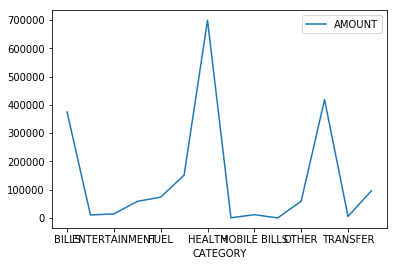

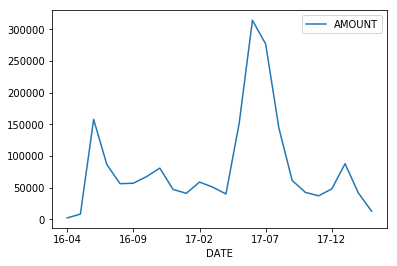

In [146]:
# df_exp[['DATE', 'AMOUNT']][df_exp.DATE == '18-02']

cat_sum = cat_grpby.sum()
month_sum = dt_grpby.sum()

cat_sum.plot()
month_sum.plot()

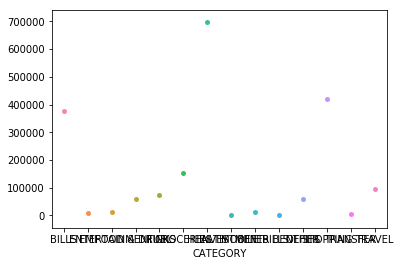

In [183]:

sns.stripplot(x=cat_sum.AMOUNT.index, y=cat_sum.AMOUNT.values)


In [184]:
dt_grpby.sum()

,AMOUNT
DATE,
16-04,2288.70000
16-05,8307.15000
16-06,157762.37000
16-07,86439.10000
16-08,56324.94000
16-09,57092.89000
16-10,67525.67648
16-11,80955.78000
16-12,47334.07000


In [206]:
# Fuel Expense Calculations
#
df_fuel = cat_grpby.get_group('FUEL')
fuel_grpby = df_fuel.groupby('DATE')

In [336]:
# Monthly consumption.
avg_km_per_litr = 19.0
avg_price_per_litr = 74.0
np_fuel = fuel_grpby.sum()

# Adding missing two months 17-09 and 17-11
fuel_amt_mean = np_fuel.AMOUNT.sum() / (np_fuel.size + 2)

def calculate_km_from_amt(amt):
    return (amt / avg_price_per_litr) * avg_km_per_litr

print ("Defaults, avg_km_per_litr: {}, avg_price_per_litr: {}\n".format(avg_km_per_litr, avg_price_per_litr))
print ("=== Monthly Fuel consumption ===")
np_fuel["LITR_PER_MONTH"] = np_fuel.AMOUNT.apply(lambda x: x / avg_price_per_litr)
np_fuel["KM_PER_MONTH"] = np_fuel.AMOUNT.apply(lambda x: calculate_km_from_amt(x))
np_fuel["COST_PER_KEM"] = [x.AMOUNT / x.KM_PER_MONTH for _, x in np_fuel.iterrows()]
print(np_fuel)

print("\nAverage fuel consumption for last: {} months: {} INR".format(np_fuel.shape[0], fuel_amt_mean))
print("\nAvg Km / month: {}".format((fuel_amt_mean / avg_price_per_litr) * avg_km_per_litr))
print("\nTotal KM: {}".format(np_fuel.KM_PER_MONTH.sum()))

print("Diesel Car details")
print("Generally diesel to petrol car price difference is 1 Lac")
print("Price difference of petrol vs diesel is kinda ~10 INR")

print("\nAVG diesel price monthly for this usage: {}".format((900 / 24.0) * 64))
print("\nMonthly saving with petrol car: 1100, Yearly saving: 1100 * 12 = 13200")

print("\nTo-recover the extra cost of 1Lac: {} years needed".format(100000.0 / 13200))

print("\nDoing FD of 1 Lac for 7 Years with 7% interest, you generate: 63000 as Interest")
print("\nInterest per month: {}".format(63000 / (7 * 12)))

Defaults, avg_km_per_litr: 19.0, avg_price_per_litr: 74.0

=== Monthly Fuel consumption ===
        AMOUNT  LITR_PER_MONTH  KM_PER_MONTH  COST_PER_KEM
DATE                                                      
16-07  2000.00       27.027027    513.513514      3.894737
16-08  6305.90       85.214865   1619.082432      3.894737
16-09  2800.00       37.837838    718.918919      3.894737
16-10  2142.11       28.947432    550.001216      3.894737
16-11  4601.00       62.175676   1181.337838      3.894737
16-12  7367.20       99.556757   1891.578378      3.894737
17-01  2599.94       35.134324    667.552162      3.894737
17-02  5372.27       72.598243   1379.366622      3.894737
17-03  1510.30       20.409459    387.779730      3.894737
17-04  6501.50       87.858108   1669.304054      3.894737
17-05  1956.24       26.435676    502.277838      3.894737
17-06  4245.55       57.372297   1090.073649      3.894737
17-07  6616.04       89.405946   1698.712973      3.894737
17-08  6068.71       82